# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [94]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy import stats

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset 
all_mice_df = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="outer")
# Display the data table for preview
all_mice_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
number_mice= all_mice_df["Mouse ID"].nunique()
number_mice

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_Id = all_mice_df.loc[all_mice_df.duplicated(subset=["Mouse ID","Timepoint"]),"Mouse ID"].unique()
duplicate_Id

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicated_Id_df=all_mice_df.loc[all_mice_df["Mouse ID"] =="g989",:]
duplicated_Id_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
clean_step_df = all_mice_df.copy()

In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df=clean_step_df.loc[clean_step_df["Mouse ID"]!="g989"]

In [7]:
# Checking the number of mice in the clean DataFrame.
clean_count= clean_df["Mouse ID"].nunique()
clean_count

248

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
reg_type=clean_df.groupby(["Drug Regimen"])
reg_type
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
#mean:
clean_mean=reg_type["Tumor Volume (mm3)"].mean()
clean_median=reg_type["Tumor Volume (mm3)"].median()
clean_var=reg_type["Tumor Volume (mm3)"].var()
clean_std=reg_type["Tumor Volume (mm3)"].std()
clean_sem=reg_type["Tumor Volume (mm3)"].sem()
# Assemble the resulting series into a single summary DataFrame.
summary_statistics=pd.DataFrame({"Tumor Volume Mean": clean_mean ,"Tumor Volume Median": clean_median ,"Tumor Volume Variance": clean_var ,"Tumor Volume Standar Deviation": clean_std ,"Tumor Volume SEM": clean_sem ,})
summary_statistics

,Tumor Volume Mean,Tumor Volume Median,Tumor Volume Variance,Tumor Volume Standar Deviation,Tumor Volume SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.
sum_stats=clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].aggregate(['mean','median','var','std','sem'])
sum_stats

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

<AxesSubplot:xlabel='Drug Regimen', ylabel='Number of Mice Tested'>

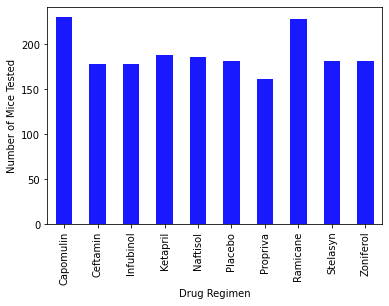

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
bar1=all_mice_df.groupby(['Drug Regimen'])['Timepoint'].count()
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")
bar1.plot(kind="bar", color="blue", alpha=0.9, align="center")

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

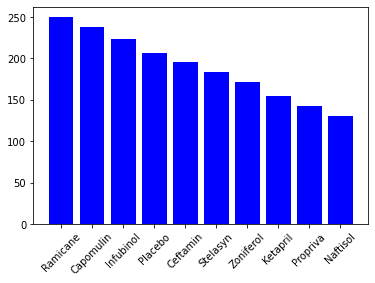

In [11]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
x_axis = all_mice_df['Drug Regimen'].unique()
y_axis = all_mice_df['Timepoint'].value_counts()

plt.bar(x_axis, y_axis, color="b", align="center")
plt.xticks(rotation=45)

<AxesSubplot:title={'center':'Gender Breakdown'}>

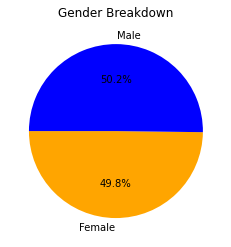

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender=all_mice_df.groupby(["Sex"])["Mouse ID"].nunique()
gender.plot(kind='pie', colors=['orange','blue'], title="Gender Breakdown", autopct="%1.1f%%", startangle=180, label='',)


#Female=all_mice_df["Sex"].value_counts()["Female"]
#Female

([<matplotlib.patches.Wedge at 0x14f8b2786d0>,
 [Text(-0.006939175976765929, -1.0999781124353174, 'Female'),
  Text(0.0069391759767660635, 1.0999781124353174, 'Male')],
 [Text(-0.003785005078235961, -0.5999880613283548, '49.8%'),
  Text(0.003785005078236034, 0.5999880613283548, '50.2%')])

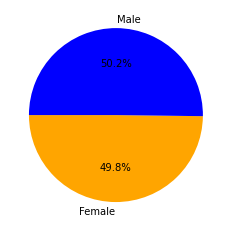

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(gender, labels=["Female","Male"], colors=["orange", "blue"], autopct="%1.1f%%", startangle=180)


## Quartiles, Outliers and Boxplots

In [60]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
#final_volume=all_mice_df.groupby("Mouse ID")#["Timepoint"].max()
#final_time=final_volume['Timepoint'].max()
#final_time
    #final_volume ---Confirmed 45 was the final timepoint for all
#all_mice_df['']
#Start by getting the last (greatest) timepoint for each mouse
final_reading=all_mice_df.loc[all_mice_df["Timepoint"] ==45,:]

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_timepoint = pd.merge(all_mice_df, final_reading, on="Timepoint", how="inner")
final_timepoint



,Mouse ID_x,Drug Regimen_x,Sex_x,Age_months_x,Weight (g)_x,Timepoint,Tumor Volume (mm3)_x,Metastatic Sites_x,Mouse ID_y,Drug Regimen_y,Sex_y,Age_months_y,Weight (g)_y,Tumor Volume (mm3)_y,Metastatic Sites_y
0,k403,Ramicane,Male,21,16,45,22.050126,1,k403,Ramicane,Male,21,16,22.050126,1
1,k403,Ramicane,Male,21,16,45,22.050126,1,s185,Capomulin,Female,3,17,23.343598,1
2,k403,Ramicane,Male,21,16,45,22.050126,1,x401,Capomulin,Female,16,15,28.484033,0
3,k403,Ramicane,Male,21,16,45,22.050126,1,m601,Capomulin,Male,22,17,28.430964,1
4,k403,Ramicane,Male,21,16,45,22.050126,1,g791,Ramicane,Male,11,16,29.128472,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16895,z969,Naftisol,Male,9,30,45,73.867845,4,y769,Ceftamin,Female,6,27,68.594745,4
16896,z969,Naftisol,Male,9,30,45,73.867845,4,y865,Ceftamin,Male,23,26,64.729837,3
16897,z969,Naftisol,Male,9,30,45,73.867845,4,z581,Infubinol,Female,24,25,62.754451,3
16898,z969,Naftisol,Male,9,30,45,73.867845,4,z795,Naftisol,Female,13,29,65.741070,3


In [61]:
# Put treatments into a list for for loop (and later for plot labels)
treatments=["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data=[]

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
for treatment in treatments:

    treatment_data=final_timepoint.loc[final_timepoint['Drug Regimen_x']==treatment, "Tumor Volume (mm3)_x" ]
    
    # add subset 
    tumor_vol_data.append(treatment_data)
    
    # Determine outliers using upper and lower bounds
    
    quartile=treatment_data.quantile([0.25,0.5,0.75])
    lowerq=quartile[0.25]
    upperq=quartile[0.75]
    iqr=upperq-lowerq
    median=quartile[0.5]
    lowerbound=lowerq-(1.5*iqr)
    upperbound=upperq+(1.5*iqr)
    

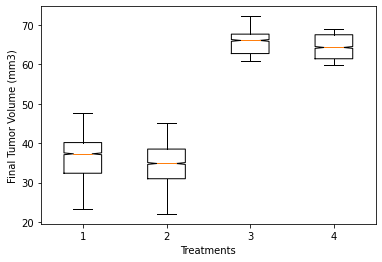

In [67]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

fig1, ax1 = plt.subplots()
ax1.set_ylabel("Final Tumor Volume (mm3)")
ax1.set_xlabel("Treatments")
ax1.boxplot(tumor_vol_data, treatments)
plt.show()



## Line and Scatter Plots

Text(0.5, 1.0, 'Capomulin treatment of mouse l509')

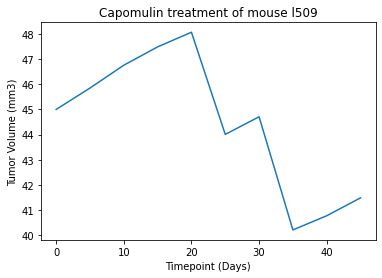

In [70]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


Capomulin_data=all_mice_df.loc[all_mice_df['Drug Regimen']=="Capomulin"]
mouse_l509=Capomulin_data.loc[Capomulin_data["Mouse ID"]=="l509"]   
plt.plot(mouse_l509["Timepoint"],mouse_l509["Tumor Volume (mm3)"])
plt.xlabel("Timepoint (Days)")
plt.ylabel('Tumor Volume (mm3)')
plt.title("Capomulin treatment of mouse l509")



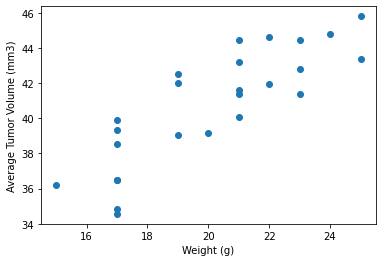

In [84]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
#capomulin_group=Capomulin_data.groupby('Weight (g)')["Tumor Volume (mm3)"].mean()
#capomulin_group
#plt.scatter(Capomulin_data("Weight (g)"), Capomulin_data["Tumor Volume (mm3)"].mean())
#plt.xlabel("Weight (g)")
#plt.ylabel('Average Tumor Volume (mm3)')

regimen_data = clean_df.loc[clean_df['Drug Regimen'] =="Capomulin" ]
averages = regimen_data.groupby(['Mouse ID']).mean()
plt.scatter(averages['Weight (g)'], averages['Tumor Volume (mm3)'])
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()



## Correlation and Regression

In [96]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
corr=round(st.pearsonr(averages['Weight (g)'],averages['Tumor Volume (mm3)'])[0],2)
print(f"The correlation between mouse weight and average tumor volume is {corr}")

x_values = averages['Weight (g)']
y_values = averages['Tumor Volume (mm3)']

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)

The correlation between mouse weight and average tumor volume is 0.84
y = 0.95x + 21.55


The r-squared is: 0.7088568047708723


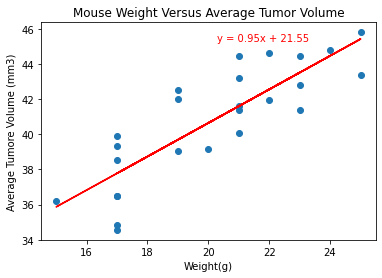

In [105]:
fig1, ax1 = plt.subplots()
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.title('Mouse Weight Versus Average Tumor Volume')
plt.xlabel('Weight(g)')
plt.ylabel('Average Tumore Volume (mm3)')
ax1.annotate(line_eq, xy=(20, 40), xycoords='data',xytext=(0.8, 0.95), textcoords='axes fraction',horizontalalignment='right', verticalalignment='top',color="red")

print(f"The r-squared is: {rvalue**2}")
plt.show()